In [85]:
import pandas as pd
import numpy as np
from helpers import calibrate_train_clfs, load_data, get_baseline, print_results, run_clf
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [88]:
keep_columns =  ['IsTraining','FTR', 'Div',  
    'away_away_team_corners_against', 'away_away_team_corners_for',	'away_away_team_goals_against',	'away_away_team_goals_for',	
    'away_away_team_possession',	'away_away_team_shotsoff_against',	'away_away_team_shotsoff_for',	'away_away_team_shotson_against',
    	'away_away_team_shotson_for',	'away_direct_team_corners_against',	'away_direct_team_corners_for',	'away_direct_team_goals_against',
        'away_direct_team_goals_for',	'away_direct_team_possession',	'away_direct_team_shotsoff_against',	'away_direct_team_shotsoff_for',
        'away_direct_team_shotson_against',	'away_direct_team_shotson_for',	'home_direct_team_corners_against',	'home_direct_team_corners_for',	
        'home_direct_team_goals_against',	'home_direct_team_goals_for',	'home_direct_team_possession',	'home_direct_team_shotsoff_against',
        'home_direct_team_shotsoff_for',	'home_direct_team_shotson_against',	'home_direct_team_shotson_for',	
        'home_home_team_corners_against',	'home_home_team_corners_for',	'home_home_team_goals_against',	'home_home_team_goals_for',	
        'home_home_team_possession',	'home_home_team_shotsoff_against',	'home_home_team_shotsoff_for',	'home_home_team_shotson_against',
                 'home_home_team_shotson_for', 
]
 
drop_columns = ['Referee', 'Date', 'HomeTeam', 'AwayTeam','FTHG',
    'B365H', 'B365D', 'B365A',                                       
    'AC', 'AF', 'AR', 'AS', 'AST', 'AY', 
    'BWA', 'BWD', 'BWH', 'Bb1X2', 'BbAH', 'BbAHh', 'BbAv<2.5', 'BbAv>2.5', 'BbAvA', 'BbAvAHA', 
    'BbAvAHH', 'BbAvD', 'BbAvH', 'BbMx<2.5', 'BbMx>2.5', 'BbMxA', 'BbMxAHA', 'BbMxAHH', 'BbMxD',
    'BbMxH', 'BbOU', 'FTAG', 
    'HC', 'HF', 'HR', 'HS', 'HST', 
    'HTAG', 'HTHG', 'HTR', 'HY', 'IWA', 'IWD', 'IWH', 
    'LBA', 'LBD', 'LBH', 'PSA', 'PSCA', 'PSCD', 'PSCH', 'PSD', 'PSH', 
    'VCA', 'VCD', 'VCH', 'WHA', 'WHD', 'WHH', 'GoalFirstHalf', 'SHHG', 'SHAG', 'GoalSecondHalf','FTR','BothToScore',
    'away_away_3_team_corners_against',
    'away_away_3_team_corners_for',
    'away_away_3_team_goals_against',
    'away_away_3_team_goals_for',
    'away_away_3_team_possession',
    'away_away_3_team_shotsoff_against',
    'away_away_3_team_shotsoff_for',
    'away_away_3_team_shotson_against',
    'away_away_3_team_shotson_for',
    'home_away_3_team_corners_against',
    'home_away_3_team_corners_for',
    'home_away_3_team_goals_against',
    'home_away_3_team_goals_for',
    'home_away_3_team_possession',
    'home_away_3_team_shotsoff_against',
    'home_away_3_team_shotsoff_for',
    'home_away_3_team_shotson_against',
    'home_away_3_team_shotson_for',
]

#
target_column = "FTR"
drop_columns.remove(target_column)
X,y = load_data(columns_to_drop=drop_columns, is_training=True, target_name=target_column)
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
dummy_y

KEEEP
LENGTH1180


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [89]:
#x = load_boston()
df = pd.DataFrame(X)
df[target_column] = y
#X = df.drop(target_column,1)   #Feature Matrix
#y = df[target_column]          #Target Variable
#print(df.iloc[0])
df.reset_index(drop=True, inplace=True)
#Using Pearson Correlation
df.drop(columns=['Div_E0', 'index'], inplace=True) 
list(df.columns)

['away_away_1_team_corners_against',
 'away_away_1_team_corners_for',
 'away_away_1_team_goals_against',
 'away_away_1_team_goals_for',
 'away_away_1_team_possession',
 'away_away_1_team_shotsoff_against',
 'away_away_1_team_shotsoff_for',
 'away_away_1_team_shotson_against',
 'away_away_1_team_shotson_for',
 'away_away_6_team_corners_against',
 'away_away_6_team_corners_for',
 'away_away_6_team_goals_against',
 'away_away_6_team_goals_for',
 'away_away_6_team_possession',
 'away_away_6_team_shotsoff_against',
 'away_away_6_team_shotsoff_for',
 'away_away_6_team_shotson_against',
 'away_away_6_team_shotson_for',
 'away_direct_team_corners_against',
 'away_direct_team_corners_for',
 'away_direct_team_goals_against',
 'away_direct_team_goals_for',
 'away_direct_team_possession',
 'away_direct_team_shotsoff_against',
 'away_direct_team_shotsoff_for',
 'away_direct_team_shotson_against',
 'away_direct_team_shotson_for',
 'away_home_1_team_corners_against',
 'away_home_1_team_corners_for',


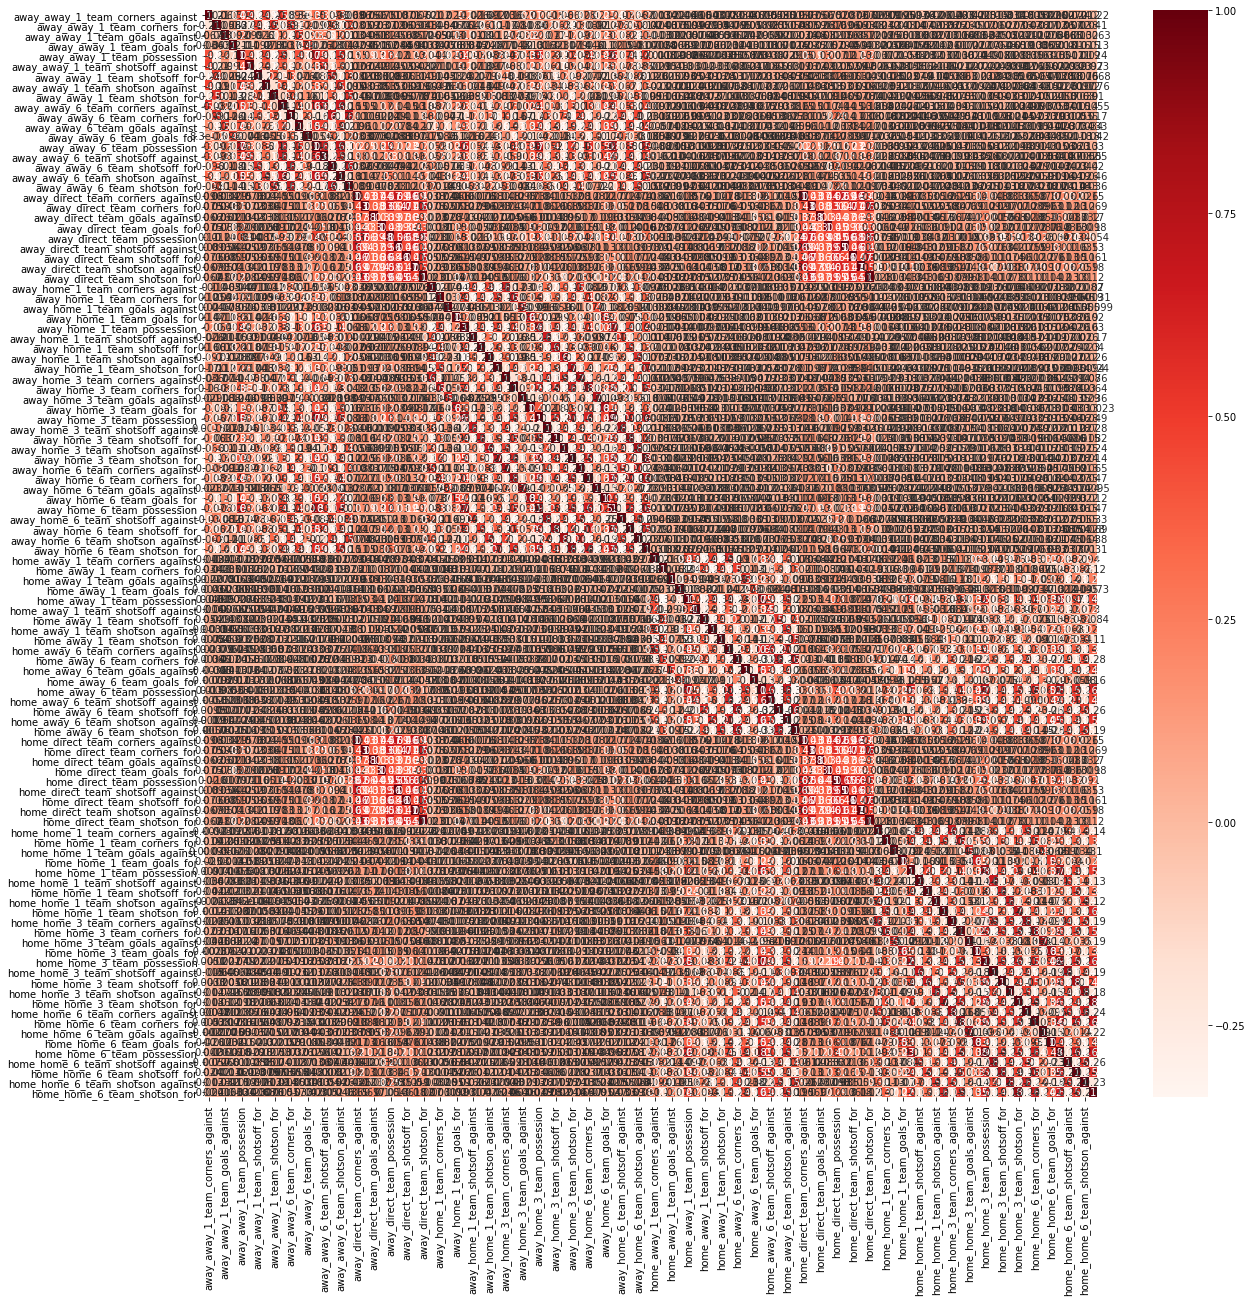

In [76]:
plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [42]:
print(cor)

                                      index      FTHG  \
index                              1.000000  0.023025   
FTHG                               0.023025  1.000000   
away_away_1_team_corners_against  -0.061743 -0.055475   
away_away_1_team_corners_for      -0.007311  0.087412   
away_away_1_team_goals_against    -0.024497 -0.137761   
away_away_1_team_goals_for        -0.005004  0.089928   
away_away_1_team_possession        0.010918 -0.087546   
away_away_1_team_shotsoff_against -0.039604 -0.090154   
away_away_1_team_shotsoff_for     -0.018380  0.083759   
away_away_1_team_shotson_against  -0.084635 -0.100080   
away_away_1_team_shotson_for      -0.072792  0.029277   
away_away_3_team_corners_against  -0.093072 -0.078340   
away_away_3_team_corners_for      -0.000023  0.105169   
away_away_3_team_goals_against    -0.017018 -0.110488   
away_away_3_team_goals_for         0.036149  0.110725   
away_away_3_team_possession       -0.012886 -0.088214   
away_away_3_team_shotsoff_again

In [77]:
cor_target = abs(cor[target_column])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features




KeyError: 'FTR'

In [ ]:
print(df[["FTR","away_away_1_team_goals_against"]].corr())